In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_id = 'Linaqruf/anything-v3.0'
pipe = StableDiffusionPipeline.from_pretrained(
  model_id,
  torch_dtype=torch.float16,
  requires_safety_checker=False
)
pipe.enable_sequential_cpu_offload()
# pipe = pipe.to('cuda')
pipe.enable_xformers_memory_efficient_attention()
pipe.safety_checker = None

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

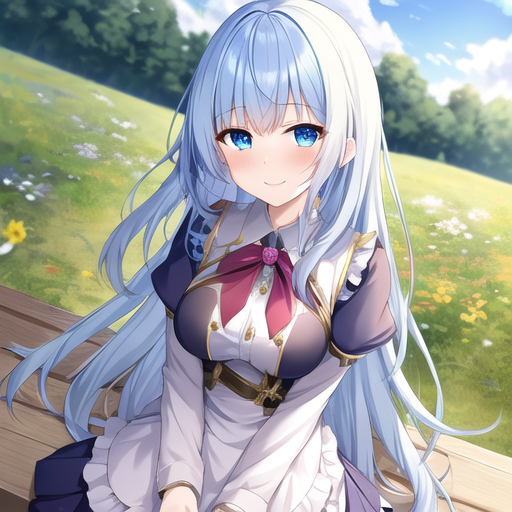

In [2]:
prompt = "anime, masterpiece, high quality, 1girl, solo, long hair, looking at viewer, blush, smile, bangs, blue eyes, skirt, medium breasts, iridescent, gradient, colorful, besides a cottage, in the country"
negative_prompt = 'simple background, duplicate, retro style, low quality, lowest quality, 1980s, 1990s, 2000s, 2005 2006 2007 2008 2009 2010 2011 2012 2013, bad anatomy, bad proportions, extra digits, lowres, username, artist name, error, duplicate, watermark, signature, text, extra digit, fewer digits, worst quality, jpeg artifacts, blurry'
args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
)
pipe(prompt, negative_prompt=negative_prompt, **args).images[0]